First few rows of the dataset:
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  

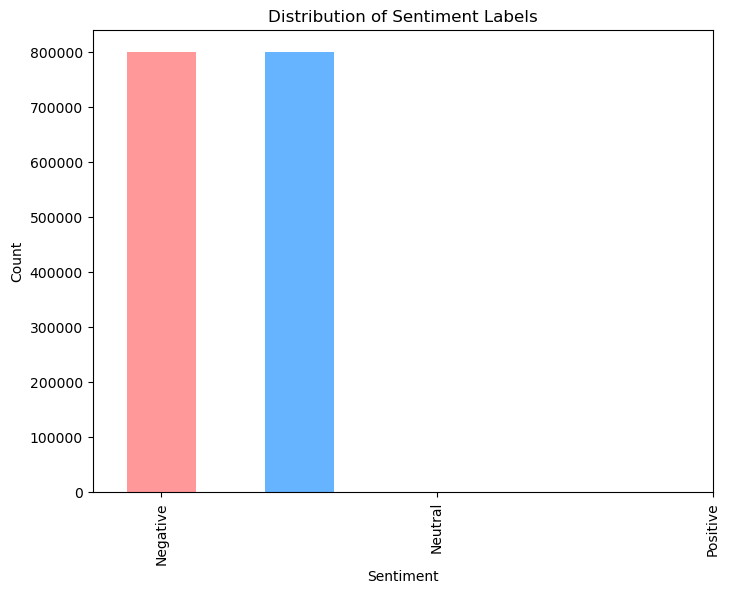

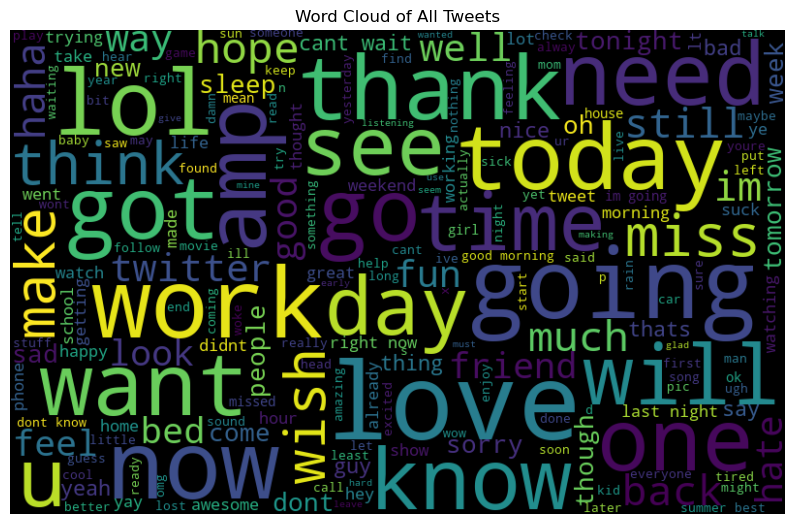

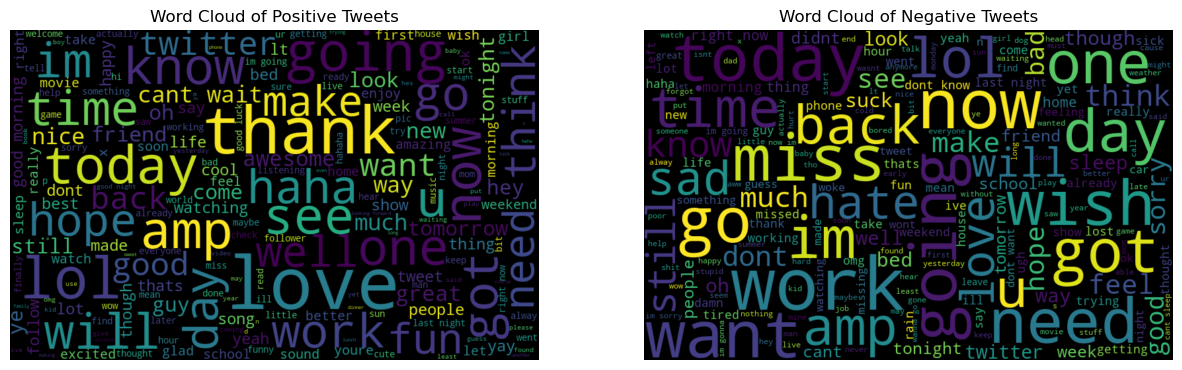

Accuracy: 0.7640139041924108
F1 Score: 0.7687457459315635
Confusion Matrix:
[[117756  39731]
 [ 35015 124237]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    157487
           1       0.76      0.78      0.77    159252

    accuracy                           0.76    316739
   macro avg       0.76      0.76      0.76    316739
weighted avg       0.76      0.76      0.76    316739



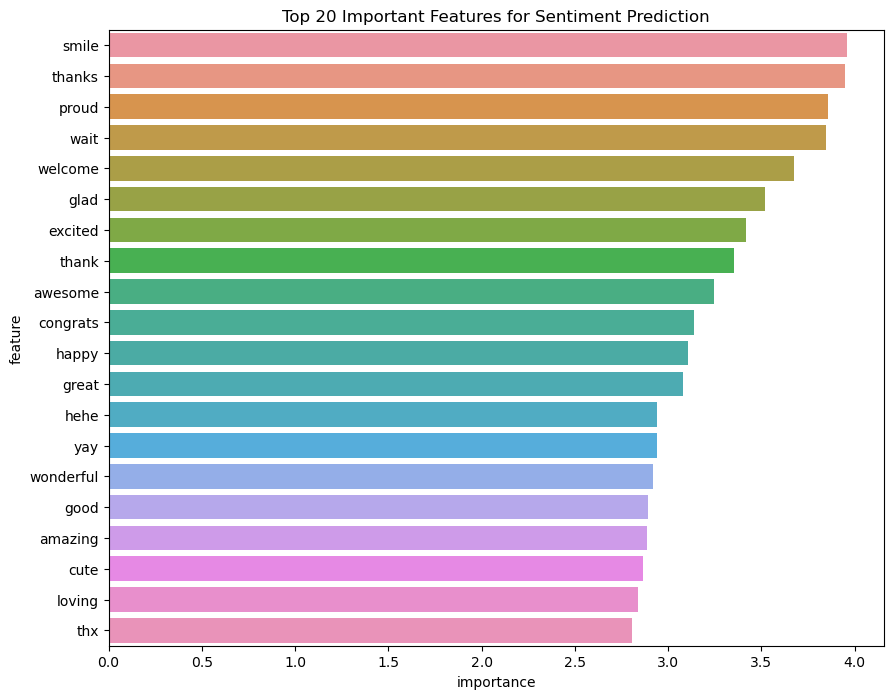

Key Insights and Recommendations:
1. The dataset has a balanced distribution of sentiment labels after cleaning.
2. Commonly used words in tweets include both neutral and sentiment-laden terms.
3. The sentiment prediction model achieved an accuracy of 0.76 and an F1 score of 0.77.
4. Top features contributing to sentiment prediction are displayed in the bar chart above.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'data_twitter.csv'  # Replace with your file path
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
tweets_df = pd.read_csv(file_path, encoding='ISO-8859-1', names=columns)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(tweets_df.head())

# Display dataset information and summary statistics
print("Dataset Information:")
print(tweets_df.info())
print("\nDataset Summary:")
print(tweets_df.describe(include='all'))

# Show the distribution of sentiments
plt.figure(figsize=(8, 6))
tweets_df['target'].value_counts().plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 2, 4], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

# Data Cleaning
# Removing unnecessary columns
tweets_df = tweets_df[['target', 'text']]

# Converting target labels (0, 4) to (0, 1)
tweets_df['target'] = tweets_df['target'].replace(4, 1)

# Dropping duplicate rows
tweets_df = tweets_df.drop_duplicates()

# Handling missing values
tweets_df = tweets_df.dropna()

# Text Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

tweets_df['text'] = tweets_df['text'].apply(preprocess_text)

# Word Frequency Analysis
all_words = ' '.join([text for text in tweets_df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Tweets')
plt.show()

# Word Frequency Analysis for Positive and Negative Sentiments
positive_words = ' '.join([text for text in tweets_df[tweets_df['target'] == 1]['text']])
negative_words = ' '.join([text for text in tweets_df[tweets_df['target'] == 0]['text']])

positive_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Tweets')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Tweets')

plt.show()

# Temporal Analysis (If timestamp data is available, this can be done)

# Splitting the data into training and testing sets
X = tweets_df['text']
y = tweets_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization
vectorizer = TfidfVectorizer(max_df=0.9, min_df=10, max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Sentiment Prediction Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Feature Importance
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_.flatten()
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': coef})
feature_importance = feature_importance.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 20 Important Features for Sentiment Prediction')
plt.show()

# Summary of Key Insights and Recommendations
print("Key Insights and Recommendations:")
print("1. The dataset has a balanced distribution of sentiment labels after cleaning.")
print("2. Commonly used words in tweets include both neutral and sentiment-laden terms.")
print(f"3. The sentiment prediction model achieved an accuracy of {accuracy:.2f} and an F1 score of {f1:.2f}.")
print("4. Top features contributing to sentiment prediction are displayed in the bar chart above.")

# (Optional) User Interface for Sentiment Analysis
# This part can be implemented using a web framework like Flask or Django to allow user input and sentiment prediction.

# Documentation
# Detailed documentation should cover data preprocessing steps, model implementation, and analysis findings.

# End of Project
